## Library Importation

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Funtions list

def count_unique_values(dataframe):
    """ Prints out the number of unique values """
    unique_counts = dataframe.nunique().sort_values(ascending=False)
    if not unique_counts.empty:
        print("Number of Unique Values for Each Column (Descending Order):")
        print(unique_counts)
    else:
        print("DataFrame is empty or has no columns.")


def print_float_columns(dataframe):
    """ Prints out only the float columns """
    float_columns = dataframe.select_dtypes(include=['float'])
    if not float_columns.empty:
        print("Columns with dtype 'float':")
        for column in float_columns.columns:
            unique_values = float_columns[column].value_counts()
            print(f"Unique values in column '{column}': {unique_values}")
    else:
        print("No columns with dtype 'float' found in the DataFrame.")


def drop_columns(dataframe, columns_to_drop):
    """ Drop specified columns from a DataFrame. """
    dataframe.drop(columns=columns_to_drop, inplace=True, errors='ignore')
    print(f"Columns {columns_to_drop} has been dropped.\n")
    print(f'There are {dataframe.shape[1]} columns left')
    return dataframe.head()


def bin_columns(dataframe, column_to_bin, bin_edges, labels):
    """ bins any column """
    try:
        if column_to_bin in dataframe.columns:
            bins = pd.cut(dataframe[column_to_bin], bins=bin_edges, labels=labels)
            dataframe[f'{column_to_bin}_Category'] = bins
            dataframe.drop(column_to_bin, axis=1, inplace=True)
            print(f"{column_to_bin} binned into custom categories.")
            print(dataframe[f'{column_to_bin}_Category'].value_counts())
        else:
            print(f"{column_to_bin} is not present in the DataFrame.")
    except Exception as e:
        print("An error occurred:", e)

        
def generate_piechart(dataframe, columns, title, label_0=None, label_1=None):
    """ Generates a pie chart """
    if isinstance(columns, str):
        # Single column case
        country_counts = dataframe[columns].value_counts()
        selected_palette = random.choice(['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'cubehelix', 'rocket', 'mako'])
        palette = sns.color_palette(selected_palette, n_colors=2)  # Use 2 colors for binary distribution
        fig, ax = plt.subplots(figsize=(5, 5))
        country_counts.plot(kind='pie', autopct='%1.2f%%', labels=[label_0, label_1], colors=palette, ax=ax)
        plt.title(title)
        plt.legend(country_counts.index, loc="center left", bbox_to_anchor=(1, 0.5))  # Add legend
        ax.set_ylabel('')
        plt.show()
    
    elif isinstance(columns, list):
        # Mixed columns case
        country_col = dataframe[columns]
        country_counts = country_col.sum()
        num_colors = len(columns)
        selected_palette = random.choice(['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'cubehelix', 'rocket', 'mako'])
        palette = sns.color_palette(selected_palette, n_colors=num_colors)
        fig, ax = plt.subplots(figsize=(5, 5))
        country_counts.plot(kind='pie', autopct='%1.2f%%', labels=country_counts.index, colors=palette, ax=ax)
        plt.title(title)
        plt.legend(country_counts.index, loc="center left", bbox_to_anchor=(1, 0.5))  # Add legend
        ax.set_ylabel('')
        plt.show()
        
    else:
        raise ValueError("Columns must be either a single column name (string) or a list of column names.")


def generate_barchat(dataframe, columns, title):
    """ Generates a bar chart """
    sns.set(style="darkgrid")
    plt.figure(figsize=(5, 5))
    num_colors = dataframe[columns].nunique()
    color_palette = sns.color_palette(random.choice(['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'cubehelix', 'rocket', 'mako']), n_colors=num_colors)
    sns.countplot(x=columns, data=dataframe, palette=color_palette)
    plt.xlabel(title)
    plt.ylabel(f'{title} Count')
    plt.title(f'{title} Distribution')
    plt.show()
    
    
def plot_roc_curve(y_test, y_probs):
    """ This function computes and plots the ROC curve with AUC for a given y_test and y_probs. """
    # Compute ROC curve metrics
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    
def model_evaluation(y_test, y_pred):
    """ Prints out the evaluation score """
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    
    
def confusion_matrix(x_test, y_pred, y_test, model):
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(XGB_model, X_test, y_test, cmap=plt.cm.Oranges, display_labels=['Class 0', 'Class 1'])
    disp.ax_.set_title('Confusion Matrix')
    disp.ax_.grid(False)
    plt.show()
    
    
def plot_model_importance(model_name):
    importances = model_name.feature_importances_
    feature_names = list(X.columns)

    # Sort features by importance
    sorted_idx = importances.argsort()[::-1]
    sorted_importances = importances[sorted_idx]
    sorted_feature_names = [feature_names[i] for i in sorted_idx]

    plt.figure(figsize=(10, 5))
    plt.bar(range(len(importances)), sorted_importances, align="center")
    plt.xticks(range(len(importances)), sorted_feature_names, rotation=45)
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.title("Feature Importances")
    plt.show()


## Data Importation and Exploration

In [4]:
df = pd.read_csv('Bank Classification Churn.csv')
df.head()

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.090909,99.0
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.50,0,...,1,0,0,0,1,2.0,0.000000,0.000000,0.030303,33.0
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.250000,400.0
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,...,1,0,0,0,1,1.0,1022.940581,1.760655,0.058824,68.0
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,...,0,0,1,0,1,2.0,0.000000,0.000000,0.151515,165.0


In [5]:
# check for rows and columns 

print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')

There are 175028 rows and 25 columns.


In [6]:
# Check for missing values

missing_columns = df.columns[df.isnull().any()]

if missing_columns.empty:
    result = None
else:
    result = missing_columns

print(result)

None


In [7]:
# Detect and remove duplicate rows

initial_rows = df.shape[0]
duplicate = df.duplicated().sum()
df = df.drop_duplicates()

final_rows = df.shape[0]

if final_rows < initial_rows:
    print(f"{duplicate} duplicates were found and removed. DataFrame now has {final_rows} rows.")
else:
    print("No duplicate values found in the DataFrame.")


69 duplicates were found and removed. DataFrame now has 174959 rows.


In [8]:
# print the dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174959 entries, 0 to 175027
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Surname             174959 non-null  int64  
 1   CreditScore         174959 non-null  float64
 2   Age                 174959 non-null  float64
 3   Tenure              174959 non-null  float64
 4   Balance             174959 non-null  float64
 5   NumOfProducts       174959 non-null  float64
 6   HasCrCard           174959 non-null  int64  
 7   IsActiveMember      174959 non-null  int64  
 8   EstimatedSalary     174959 non-null  float64
 9   Exited              174959 non-null  int64  
 10  Surname_tfidf_0     174959 non-null  float64
 11  Surname_tfidf_1     174959 non-null  float64
 12  Surname_tfidf_2     174959 non-null  float64
 13  Surname_tfidf_3     174959 non-null  float64
 14  Surname_tfidf_4     174959 non-null  float64
 15  France              174959 non-null  in

In [9]:
# print out the number of unique values 

count_unique_values(df)

Number of Unique Values for Each Column (Descending Order):
Cred_Bal_Sal          72043
Bal_sal               64461
EstimatedSalary       55581
Balance               30239
Surname                2932
Surname_tfidf_0        1007
Surname_tfidf_4        1007
Surname_tfidf_3        1007
Surname_tfidf_1        1007
Surname_tfidf_2        1007
CreditScore             460
Tenure_Age              444
Age_Tenure_product      389
Age                      73
Tenure                   11
Mem__no__Products         5
NumOfProducts             4
Exited                    2
IsActiveMember            2
HasCrCard                 2
France                    2
Germany                   2
Spain                     2
Female                    2
Male                      2
dtype: int64


In [10]:
# print float unique values

print_float_columns(df)

Columns with dtype 'float':
Unique values in column 'CreditScore': CreditScore
850.0    2761
678.0    2362
684.0    1769
667.0    1711
705.0    1658
         ... 
423.0       2
373.0       2
351.0       1
407.0       1
395.0       1
Name: count, Length: 460, dtype: int64
Unique values in column 'Age': Age
37.00    9731
38.00    9722
35.00    9590
34.00    9066
36.00    9008
         ... 
85.00       4
36.44       2
32.34       2
45.25       1
88.00       1
Name: count, Length: 73, dtype: int64
Unique values in column 'Tenure': Tenure
2.0     19076
7.0     18828
8.0     18540
4.0     18538
5.0     18271
1.0     17786
9.0     17687
3.0     17633
6.0     16782
10.0     6398
0.0      5420
Name: count, dtype: int64
Unique values in column 'Balance': Balance
0.00         93222
124577.33       89
127864.40       65
122314.50       64
129855.32       60
             ...  
133467.63        1
104450.05        1
101191.80        1
99845.24         1
90022.85         1
Name: count, Length: 30239, 

In [11]:
# view all the float data

df.select_dtypes(include=['float']).columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'Surname_tfidf_0', 'Surname_tfidf_1',
       'Surname_tfidf_2', 'Surname_tfidf_3', 'Surname_tfidf_4',
       'Mem__no__Products', 'Cred_Bal_Sal', 'Bal_sal', 'Tenure_Age',
       'Age_Tenure_product'],
      dtype='object')

### Data Wrangling

In [12]:
# converting float columns to ints

float_to_int = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'Mem__no__Products']

df[float_to_int] = df[float_to_int].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 174959 entries, 0 to 175027
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Surname             174959 non-null  int64  
 1   CreditScore         174959 non-null  int32  
 2   Age                 174959 non-null  int32  
 3   Tenure              174959 non-null  int32  
 4   Balance             174959 non-null  float64
 5   NumOfProducts       174959 non-null  int32  
 6   HasCrCard           174959 non-null  int64  
 7   IsActiveMember      174959 non-null  int64  
 8   EstimatedSalary     174959 non-null  float64
 9   Exited              174959 non-null  int64  
 10  Surname_tfidf_0     174959 non-null  float64
 11  Surname_tfidf_1     174959 non-null  float64
 12  Surname_tfidf_2     174959 non-null  float64
 13  Surname_tfidf_3     174959 non-null  float64
 14  Surname_tfidf_4     174959 non-null  float64
 15  France              174959 non-null  in

In [13]:
# drop off some columns that wouldn't be neccessary

first_col = ['Surname', 'Age_Tenure_product', 'Tenure_Age', 'Mem__no__Products', 
            'Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2', 'Surname_tfidf_3', 
            'Surname_tfidf_4', 'Bal_sal', 'Cred_Bal_Sal']
drop_columns(df, first_col)

Columns ['Surname', 'Age_Tenure_product', 'Tenure_Age', 'Mem__no__Products', 'Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2', 'Surname_tfidf_3', 'Surname_tfidf_4', 'Bal_sal', 'Cred_Bal_Sal'] has been dropped.

There are 14 columns left


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,668,33,3,0.00,2,1,0,181449.97,0,1,0,0,0,1
1,627,33,1,0.00,2,1,1,49503.50,0,1,0,0,0,1
2,678,40,10,0.00,2,1,0,184866.69,0,1,0,0,0,1
3,581,34,2,148882.54,1,1,1,84560.88,0,1,0,0,0,1
4,716,33,5,0.00,2,1,1,15068.83,0,0,0,1,0,1


In [14]:
# Bin the credit score column

bin_edges = [300, 580, 670, 740, 800, 850]
labels=['Bad', 'Fair', 'Good', 'Very Good', 'Excellent']

bin_columns(df, 'CreditScore', bin_edges, labels)

CreditScore binned into custom categories.
CreditScore_Category
Fair         65462
Good         54309
Bad          30488
Very Good    17468
Excellent     7232
Name: count, dtype: int64


In [15]:
# bin columns
print(df.EstimatedSalary.min())
print(df.EstimatedSalary.max())
print('\n')
print(df.EstimatedSalary.value_counts())

11.58
199992.48


EstimatedSalary
88890.05     179
140941.47    108
167984.72    101
129964.94     99
90876.95      99
            ... 
95890.79       1
187985.41      1
179536.36      1
176640.29      1
157474.10      1
Name: count, Length: 55581, dtype: int64


In [16]:
# Bin the Age column

bin_edges = [18, 30, 40, 50, 60, 70, 80, 90, 92]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-92']

bin_columns(df, 'Age', bin_edges, labels)

Age binned into custom categories.
Age_Category
30-39    88334
40-49    39424
18-29    30680
50-59    11904
60-69     3602
70-79      820
80-89       42
90-92       13
Name: count, dtype: int64


### Exploratory Data Analysis 

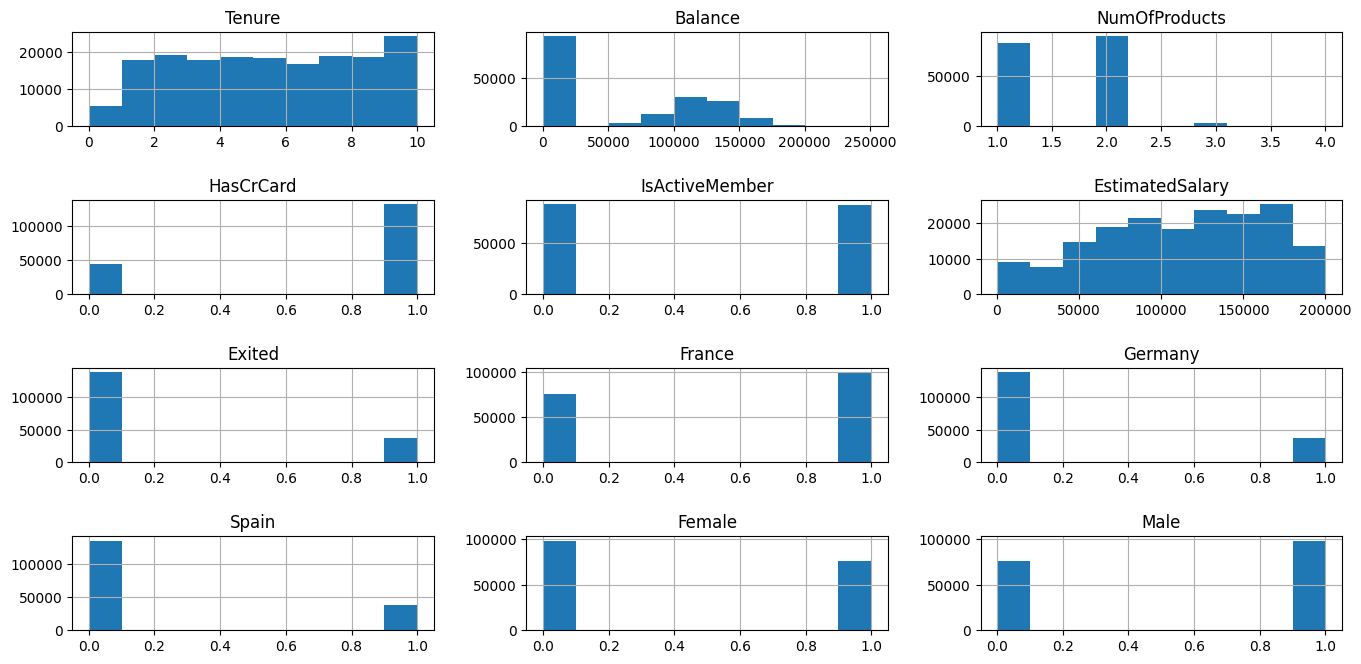

In [17]:
# hist representation of the data

df.hist(figsize=(14, 7))
plt.tight_layout(pad=2.0) 
plt.show()

##### Categorical Data Visualisation

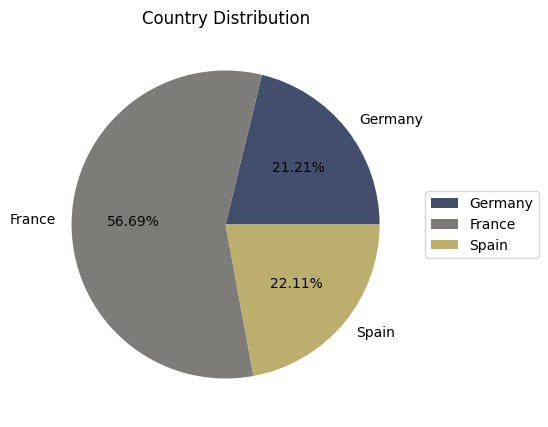

In [18]:
# Country Distribution

column = ['Germany', 'France', 'Spain']
title= 'Country Distribution'

generate_piechart(df, column, title)

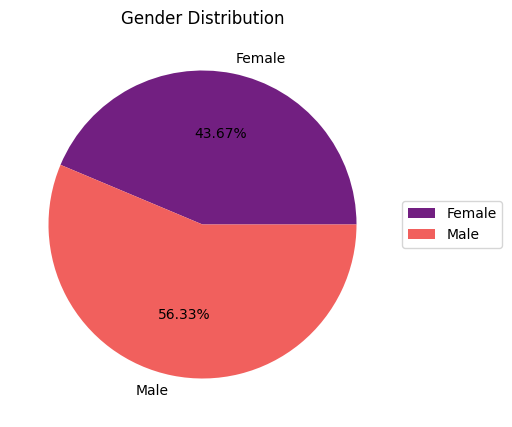

In [19]:
# Gender distribution

gender_col = ['Female', 'Male']
title= 'Gender Distribution'

generate_piechart(df, gender_col, title)

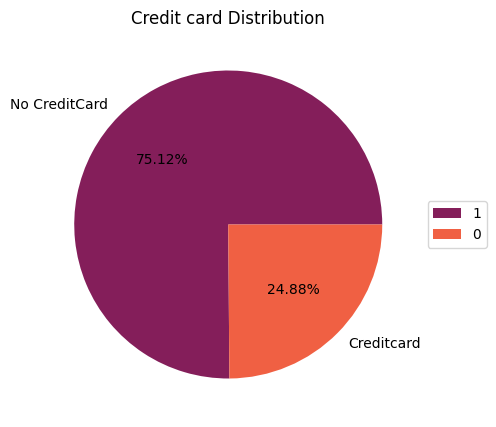

In [20]:
# Has Credit Card 

col = 'HasCrCard'
title= 'Credit card Distribution'
generate_piechart(df, col, title, label_0= 'No CreditCard', label_1= 'Creditcard')


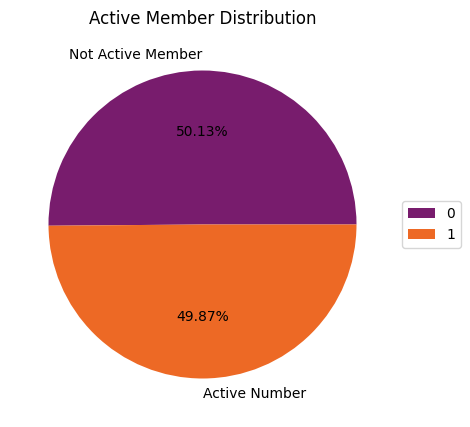

In [21]:
# Active Member Distribution 

col = 'IsActiveMember'
title= 'Active Member Distribution'

generate_piechart(df, col, title, label_0= 'Not Active Member', label_1= 'Active Number')


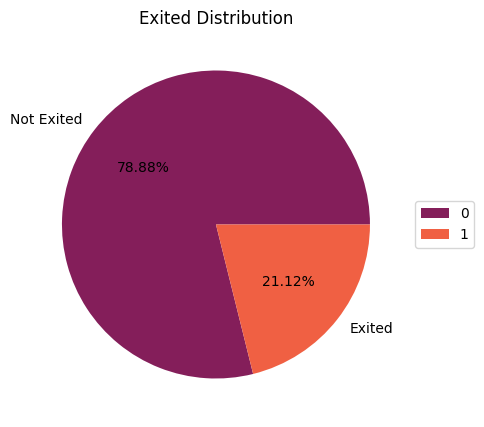

In [22]:
# Existed 

col = 'Exited'
title= 'Exited Distribution'

generate_piechart(df, col, title, label_0= 'Not Exited', label_1= 'Exited')

##### Numerical Data Visualisation

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12808\4066573395.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columns, data=dataframe, palette=color_palette)


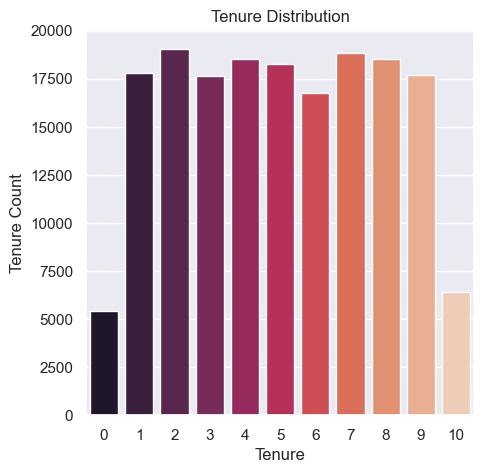

In [23]:
# Tenure distribution 

generate_barchat(df, 'Tenure', 'Tenure')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12808\4066573395.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columns, data=dataframe, palette=color_palette)


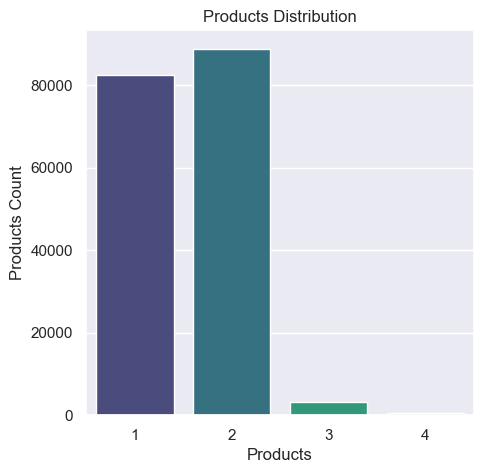

In [24]:
# Number of products review

generate_barchat(df, 'NumOfProducts', 'Products')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12808\4066573395.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columns, data=dataframe, palette=color_palette)


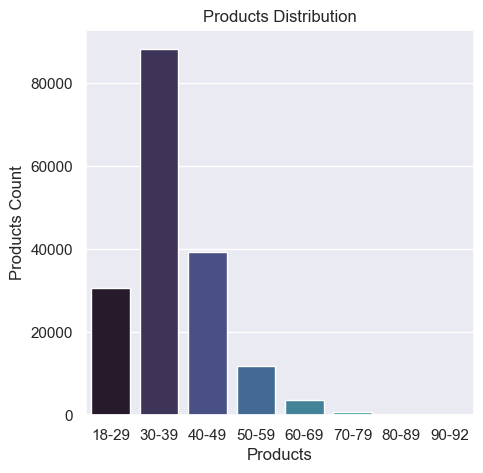

In [25]:
generate_barchat(df, 'Age_Category', 'Products')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12808\4066573395.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columns, data=dataframe, palette=color_palette)


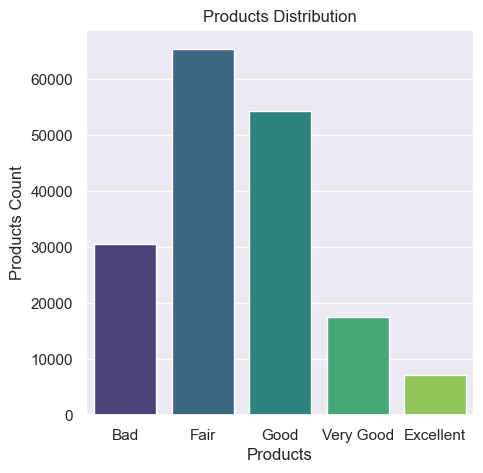

In [26]:
generate_barchat(df, 'CreditScore_Category', 'Products')

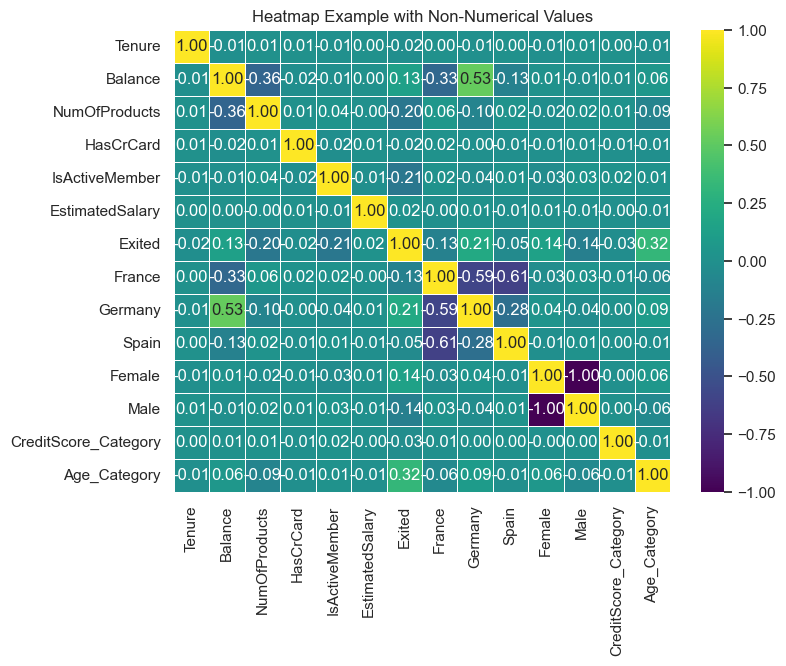

In [27]:
df_map = df.copy()

non_numerical_columns = df_map.select_dtypes(exclude=['number']).columns

for col in non_numerical_columns:
    df_map[col] = df_map[col].astype('category').cat.codes

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_map.corr(), annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Heatmap Example with Non-Numerical Values')
plt.show()

### Machine Learning for Classification

In [28]:
# machine learning models

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, auc, roc_curve
import warnings

warnings.filterwarnings("ignore")
test_size = 0.2
random_state = 42

In [29]:
ml = df.copy()
ml.head()

,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male,CreditScore_Category,Age_Category
0,3,0.00,2,1,0,181449.97,0,1,0,0,0,1,Fair,30-39
1,1,0.00,2,1,1,49503.50,0,1,0,0,0,1,Fair,30-39
2,10,0.00,2,1,0,184866.69,0,1,0,0,0,1,Good,30-39
3,2,148882.54,1,1,1,84560.88,0,1,0,0,0,1,Fair,30-39
4,5,0.00,2,1,1,15068.83,0,0,0,1,0,1,Good,30-39


In [30]:
# Encoding the categorical data using LabelEncoder

le = LabelEncoder()
for col in ml.columns:
    if ml[col].dtype == 'category':
        ml[col] = le.fit_transform(ml[col])
        print(ml[col].unique())

[2 3 4 0 1]
[1 0 2 5 3 4 8 6 7]


In [73]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174959 entries, 0 to 175027
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Tenure                174959 non-null  int32  
 1   Balance               174959 non-null  float64
 2   NumOfProducts         174959 non-null  int32  
 3   HasCrCard             174959 non-null  int64  
 4   IsActiveMember        174959 non-null  int64  
 5   EstimatedSalary       174959 non-null  float64
 6   Exited                174959 non-null  int64  
 7   France                174959 non-null  int64  
 8   Germany               174959 non-null  int64  
 9   Female                174959 non-null  int64  
 10  CreditScore_Category  174959 non-null  int32  
 11  Age_Category          174959 non-null  int32  
dtypes: float64(2), int32(4), int64(6)
memory usage: 14.7 MB


In [31]:
# Preprocess numerical features (consider scaling or normalization)

scaler = StandardScaler()
num_feat = ['Balance', 'EstimatedSalary']
ml[num_feat] = scaler.fit_transform(ml[num_feat])

ml.head()


,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male,CreditScore_Category,Age_Category
0,3,-0.899938,2,1,0,1.369477,0,1,0,0,0,1,2,1
1,1,-0.899938,2,1,1,-1.227231,0,1,0,0,0,1,2,1
2,10,-0.899938,2,1,0,1.436718,0,1,0,0,0,1,3,1
3,2,1.463864,1,1,1,-0.537302,0,1,0,0,0,1,2,1
4,5,-0.899938,2,1,1,-1.904906,0,0,0,1,0,1,3,1


In [32]:
drop_col = ['Spain', "Male"]

drop_columns(ml, drop_col)

Columns ['Spain', 'Male'] has been dropped.

There are 12 columns left


,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Female,CreditScore_Category,Age_Category
0,3,-0.899938,2,1,0,1.369477,0,1,0,0,2,1
1,1,-0.899938,2,1,1,-1.227231,0,1,0,0,2,1
2,10,-0.899938,2,1,0,1.436718,0,1,0,0,3,1
3,2,1.463864,1,1,1,-0.537302,0,1,0,0,2,1
4,5,-0.899938,2,1,1,-1.904906,0,0,0,0,3,1


In [33]:
print(f'There are {ml.shape[0]} rows and {ml.shape[1]} columns')

There are 174959 rows and 12 columns


In [34]:
# split data into X and y

X = ml.drop('Exited', axis =1)
y = ml.Exited

print(X.columns)
print('\n')
print(y.name)

Index(['Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'France', 'Germany', 'Female',
       'CreditScore_Category', 'Age_Category'],
      dtype='object')


Exited


In [35]:
# Split data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

print('Training is complete')

Training is complete


In [36]:
# Build and train the model (would consider other algorithms like XGBClassifier or LightGBM)

model = RandomForestClassifier(n_estimators=100, random_state=random_state)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluating Model Performance

In [37]:
# Predict probabilities for positive class
y_probs = model.predict_proba(X_test)[:, 1]

y_pred = model.predict(X_test)

print(y_probs)
print(y_pred)

[0.   0.47 0.08 ... 0.9  0.02 0.01]
[0 0 0 ... 1 0 0]


In [38]:
# Evaluate model performance

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 3))
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1-score:", round(f1, 3))

Accuracy: 0.838
Precision: 0.66
Recall: 0.51
F1-score: 0.576


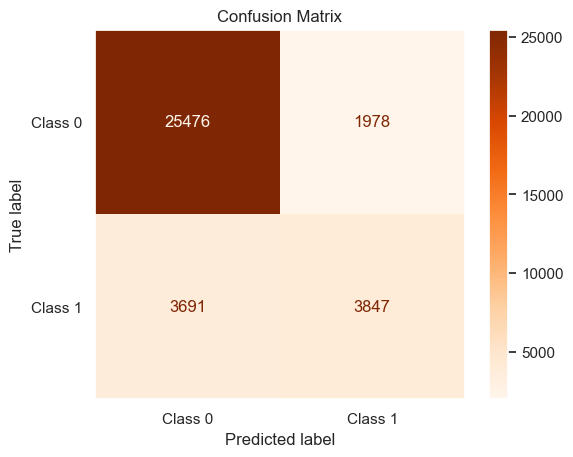

In [39]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1'])  # Pass the calculated confusion matrix here
disp.plot(cmap=plt.cm.Oranges)  # Use the plot() method to create the visualization
disp.ax_.set_title('Confusion Matrix')
disp.ax_.grid(False)
plt.show()

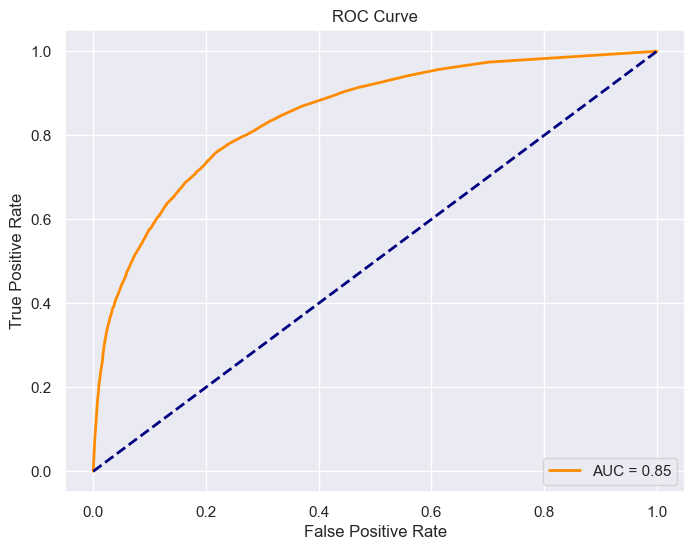

In [40]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

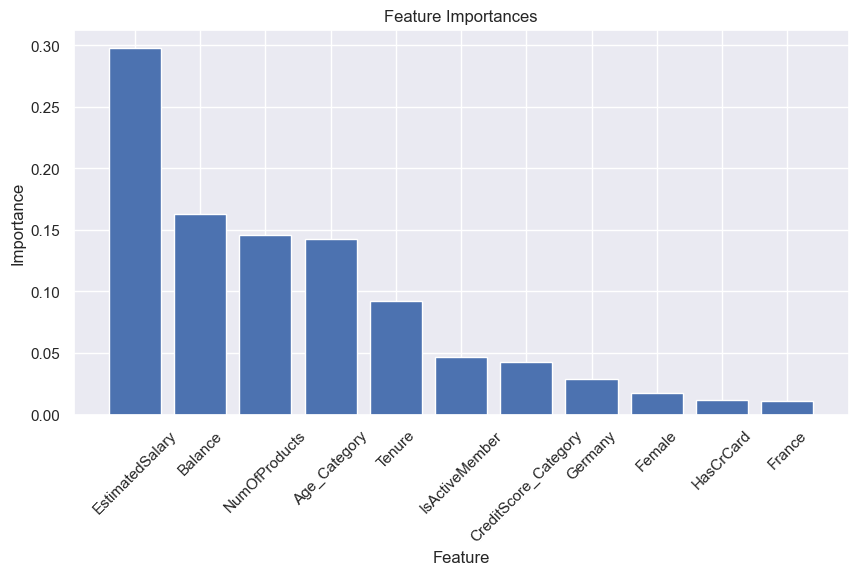

In [41]:
# Feature importance For Random Forest Classifier

plot_model_importance(model)

### Parrallel Models using XGBoost

In [42]:
XGB_model = XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,    
    max_depth=3,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    seed=random_state,
)

XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [43]:
y_probs = XGB_model.predict_proba(X_test)[:, 1]

print(y_probs)

[0.02402473 0.44890356 0.06561564 ... 0.45308897 0.13046286 0.04915561]


In [44]:
# Evaluate model performance
y_pred = XGB_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 3))
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1-score:", round(f1, 3))

Accuracy: 0.858
Precision: 0.749
Recall: 0.514
F1-score: 0.609


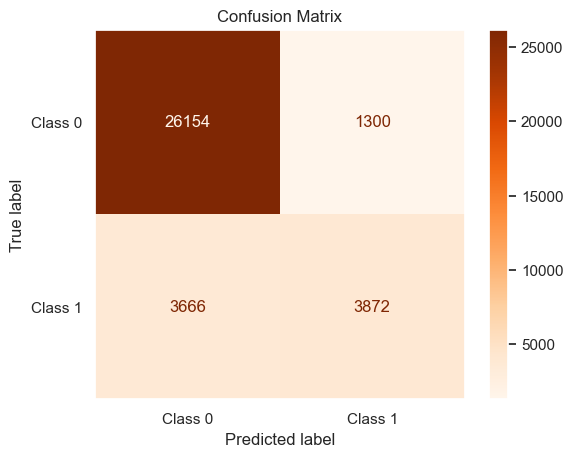

In [45]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1'])  # Pass the calculated confusion matrix here
disp.plot(cmap=plt.cm.Oranges)  # Use the plot() method to create the visualization
disp.ax_.set_title('Confusion Matrix')
disp.ax_.grid(False)
plt.show()

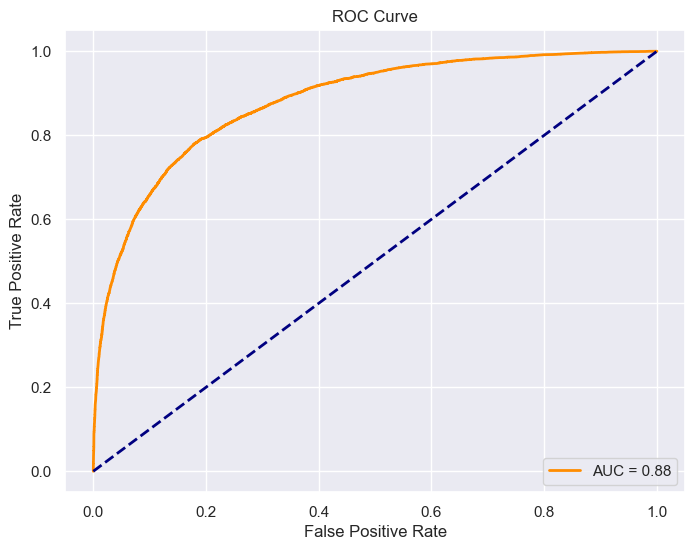

In [46]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

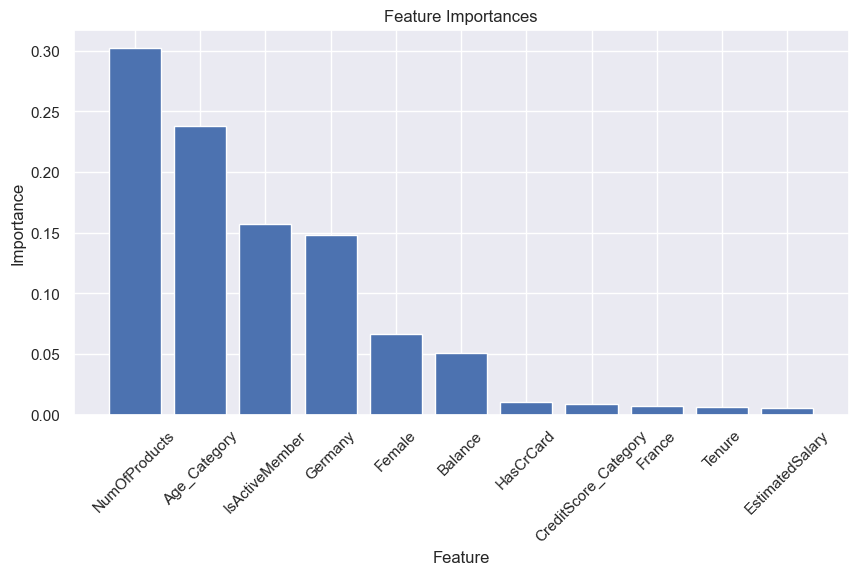

In [47]:
# Feature importance For XGBoost Classifier

plot_model_importance(XGB_model)

### Handling the imbalance dataset using SMOTE

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
# Naming instance and creating the new sample values 

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=random_state)

print('Training is complete')

Training is complete


In [51]:
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [52]:
print(X.shape)
print(y.shape)

(174959, 11)
(174959,)


In [53]:
# Predict probabilities for positive class
XGBy_probs = XGB_model.predict_proba(X_test)[:, 1]

y_pred = XGB_model.predict(X_test)

print(y_probs)
print(y_pred)

[0.02402473 0.44890356 0.06561564 ... 0.45308897 0.13046286 0.04915561]
[0 1 0 ... 1 0 1]


In [54]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 7))
print("Precision:", round(precision, 7))
print("Recall:", round(recall, 7))
print("F1-score:", round(f1, 7))

Accuracy: 0.8073837
Precision: 0.8078338
Recall: 0.8085045
F1-score: 0.808169


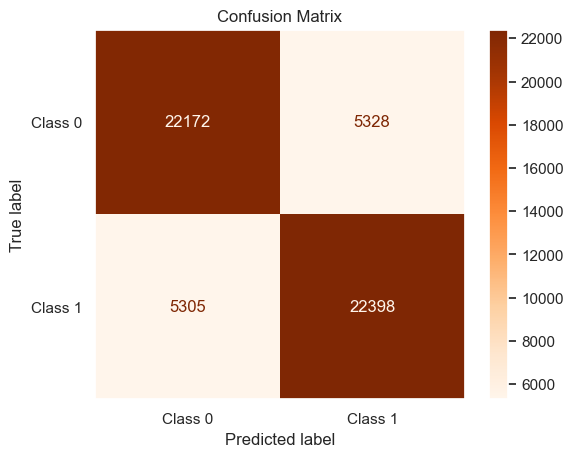

In [55]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1'])  # Pass the calculated confusion matrix here
disp.plot(cmap=plt.cm.Oranges)  # Use the plot() method to create the visualization
disp.ax_.set_title('Confusion Matrix')
disp.ax_.grid(False)
plt.show()

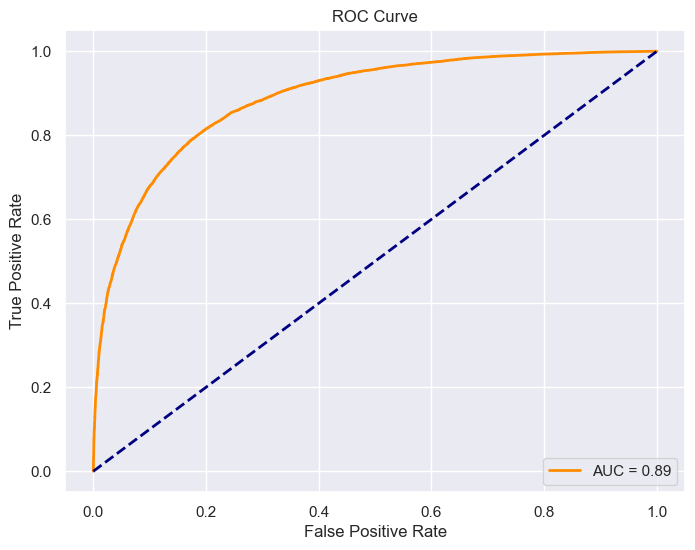

In [56]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, XGBy_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Clustering Model

In [57]:
from sklearn.cluster import KMeans

palette = "viridis"

In [58]:
# creating the cluster 

cluster_df = X_test.copy()
cluster_df['churn_probability'] = XGBy_probs

cluster_df.head()

,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Female,CreditScore_Category,Age_Category,churn_probability
138287,4,0.960126,1,1,1,-0.392791,1,0,0,0,4,0.380121
174878,8,0.957754,1,0,1,0.231905,0,1,0,2,3,0.843850
136338,9,-0.899938,2,1,0,-1.307538,0,0,1,3,1,0.135657
169992,3,1.047998,2,0,0,-0.096142,1,0,0,3,1,0.196676
236229,0,1.238605,1,1,0,0.757853,0,1,1,3,2,0.942086


In [59]:
# using the k-means cluster to rank the churn probability

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)

kmeans.fit(cluster_df['churn_probability'].values.reshape(-1, 1))

cluster_labels = kmeans.labels_
print('Successful')

Successful


In [60]:
# creating the cluster label name from the clusters 

cluster_df["Cluster"] = cluster_labels

cluster_labels = {2: 'low', 0: 'medium', 1: 'high'}
cluster_df['Cluster_label'] = cluster_df['Cluster'].map(cluster_labels)

cluster_df.head()

,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Female,CreditScore_Category,Age_Category,churn_probability,Cluster,Cluster_label
138287,4,0.960126,1,1,1,-0.392791,1,0,0,0,4,0.380121,0,medium
174878,8,0.957754,1,0,1,0.231905,0,1,0,2,3,0.843850,1,high
136338,9,-0.899938,2,1,0,-1.307538,0,0,1,3,1,0.135657,2,low
169992,3,1.047998,2,0,0,-0.096142,1,0,0,3,1,0.196676,2,low
236229,0,1.238605,1,1,0,0.757853,0,1,1,3,2,0.942086,1,high


In [61]:
# descriptive statistics for the clusters

descriptive_stats = cluster_df.groupby("Cluster")["churn_probability"].describe()
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,14335.0,0.479278,0.106541,0.299360,0.390687,0.472984,0.572555,0.666378
1,21536.0,0.855411,0.091184,0.666479,0.774964,0.866995,0.933139,0.995372
2,19332.0,0.120768,0.071920,0.015948,0.059698,0.103567,0.162688,0.299203


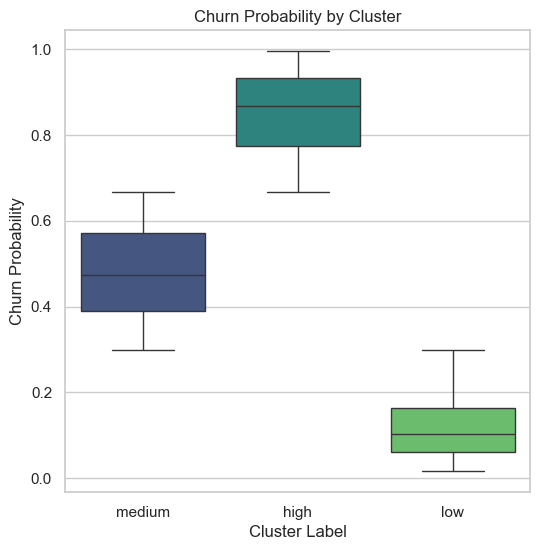

In [62]:
# Churn Probabiliy boxplot by Cluster

sns.set(style="whitegrid")
plt.figure(figsize=(6, 6)) 
sns.boxplot(x="Cluster_label", y="churn_probability", data=cluster_df, palette=palette)
plt.xlabel("Cluster Label")
plt.ylabel("Churn Probability")
plt.title("Churn Probability by Cluster")
plt.show()

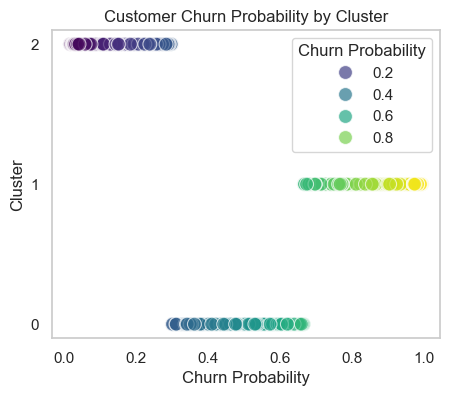

In [63]:
# scattered plot showing churn probability against the clusters

sns.set(style="whitegrid")
plt.figure(figsize=(5, 4)) 
sns.scatterplot(x="churn_probability", y="Cluster", hue="churn_probability", data=cluster_df, palette=palette, alpha=0.7, s=100)
plt.xlabel("Churn Probability")
plt.ylabel("Cluster")
plt.title("Customer Churn Probability by Cluster")
plt.legend(title="Churn Probability", loc="upper right")
plt.yticks([0, 1, 2])
plt.grid(None)
plt.show()

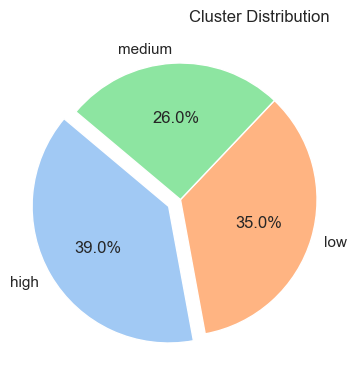

In [64]:
# pie chart showing the distribution for churn clusters 

data = cluster_df['Cluster_label'].value_counts()

plt.figure(figsize=(4, 4)) 
explode = tuple([0.1 if i == 0 else 0 for i in range(len(data))])
sns.set_palette('pastel') 
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Cluster Distribution', loc='right', pad=20) 
plt.axis('equal')
plt.show()

### Evaluation for the Clustering Model using Silhouette score and Calinski-Harabasz index

In [65]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

##### Silhouette score 

In [66]:
silhouette_avg = silhouette_score(cluster_df["churn_probability"].values.reshape(-1, 1), cluster_df["Cluster"])
print("Silhouette Score:", round(silhouette_avg, 2))

Silhouette Score: 0.66


This score indicates reasonable clustering. Scores above 0.5 generally suggest acceptable cluster separation. It implies that data points are, on average, well-separated from points in other clusters and reasonably well-grouped within their own clusters.

##### Calinski-Harabasz index

In [67]:
chi_score = calinski_harabasz_score(cluster_df["churn_probability"].values.reshape(-1, 1), cluster_df["Cluster"])
print("Calinski-Harabasz Index:", round(chi_score, 2))

Calinski-Harabasz Index: 344057.42


This score is really high. Generally, higher CHI scores mean the clusters are better separated. Scores closer to 0 indicate poor separation, while higher scores suggest more clearly defined clusters.

### Model Deployment

In [70]:
import pickle

In [71]:
with open('models/classifier_model.pkl', 'wb') as f:
    pickle.dump(XGB_model, f)

In [72]:
with open('models/cluster_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)